##### 3. Aproximação de funções

In [1]:
import numpy as np
import matplotlib.pyplot as plt

São definido as funções para o MLP.

In [2]:
def activation_y(u):
    return np.tanh(u)

def derivActivation_y(u):
    return (((2/(np.exp(u) + np.exp(-u)))*(2/(np.exp(u) + np.exp(-u)))))

def derivActivation_h(u):
    return (((2/(np.exp(u) + np.exp(-u)))*(2/(np.exp(u) + np.exp(-u)))))

def activation_h(u):
    return np.tanh(u)

In [3]:
def trainMLP(x, y, p, eta, tol, maxEpocas):
    m = y.shape[1]
    n = np.shape(x)[1]
    N = np.shape(x)[0]
    z = np.matrix(np.random.rand(n+1,p)-0.5)
    w = np.matrix(np.random.rand(p+1,m)-0.5)
    
    xAtual = np.zeros((1, n+1))
    nEpocas = 0
    erroEpoca = tol+1
    evec = [[0]]

    while erroEpoca > tol and nEpocas < maxEpocas - 1:
        ei2 = 0
        xseq = np.arange(N)

        for i in range(N):
            irand = xseq[i]
            xAtual[0,:-1] = x[irand]
            xAtual[0,-1] = 1
            yAtual = y[irand]

            U = np.array(np.dot(xAtual,z), ndmin = 2)
            h_i = activation_h(U)
            hBias = np.append(h_i,[[1]],axis=1)

            yhat_i = np.array(np.dot(hBias, w), ndmin=2)
            yhatClass_i = activation_y(yhat_i)

            e_i = yAtual - yhatClass_i
            flinhaO = derivActivation_y(yhat_i)
            dO= e_i*flinhaO

            wMinus = w[:-1, :]
            eHidden = np.dot(dO, wMinus.T)
            flinhaU = derivActivation_h(U)
            dU = np.multiply(eHidden, flinhaU)

            w = w +eta*np.dot(hBias.T, dO)
            z = z +eta*np.dot(xAtual.T, dU)
            ei2 = ei2 + np.dot(e_i, e_i.T)

        if nEpocas == 0: evec[0] = np.squeeze(ei2/N)
        nEpocas += 1
        evec = np.append(evec, np.squeeze(ei2/N))
        erroEpoca = evec[nEpocas]

    return w, z, evec

In [4]:
def yMLP(x, z, w):
  x = np.append(x, np.ones((x.shape[0],1)), axis = 1)
  h_hat = activation_h(np.dot(x,z))
  h_bias = np.append(h_hat, np.ones((h_hat.shape[0], 1)), axis = 1)
  output = np.dot(h_bias, w)
  yEval = activation_y(output)
  
  return yEval

In [5]:
def scoreCalc(yEval, yReal):
    yEval = np.array(yEval, ndmin = 2).T
    error = yReal - yEval
    MSE = np.dot(error.T, error)/yEval.shape[0]

    return MSE

É definido a função do problema.

In [6]:
def f_x(x_in):
    return (np.sin(x_in)/x_in)

São gerado os dados de treino para o problema, a partir da função de entrada. Para 45 pontos.

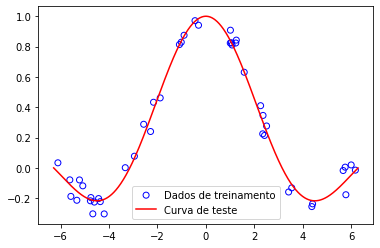

In [7]:
N = 45
xmin = -2*np.pi
xmax =  2*np.pi
x_train = xmin + (xmax - xmin) * np.random.rand(N, 1)
minLimit = -0.1
maxLimit =  0.1
ruido = minLimit + (maxLimit - minLimit) * np.random.rand(N, 1)

y_train = f_x(x_train)
y_train = y_train + ruido
y_train = np.array(y_train, ndmin = 2)

x_test = np.array(np.arange(xmin, xmax, 0.01), ndmin = 2).T
y_test = f_x(x_test)

plt.scatter(x_train, y_train, facecolor = 'none', edgecolor = 'blue')
plt.plot(x_test, y_test, 'r')
plt.legend(['Dados de treinamento', 'Curva de teste'])
plt.show()

É feito então a exibição dos resultados a partir do treino pelo MLP.

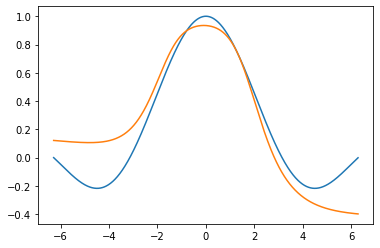

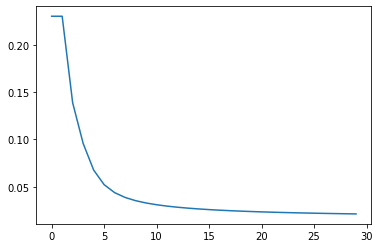

Erro médio quadrado: 0.0312+-0.0


In [8]:
minLimit = -0.1
maxLimit = 0.1
eta = 0.1
maxEpocas = 30
p_in = 20
tol = 1e-5

iterations = 1
yEval = np.zeros((x_test.shape[0], iterations))
mse = np.zeros(iterations)

for i in range(iterations):
    x_train = xmin + (xmax - xmin) * np.random.rand(N, 1)
    ruido = minLimit + (maxLimit - minLimit) * np.random.rand(N, 1)
    y_train = f_x(x_train)
    y_train = y_train + ruido
    y_train = np.array(y_train, ndmin = 2)
    x_test = np.array(np.arange(xmin, xmax, 0.01), ndmin = 2).T
    y_test = f_x(x_test)
    xin = np.array(x_train)
    yin = np.array(y_train)
    wt,zt,erroEpocas = trainMLP(xin, yin, p_in, eta, tol, maxEpocas)
    yEval[:,i] = np.squeeze(yMLP(x_test, zt, wt))
    mse[i] = scoreCalc(yEval[:,i], y_test)

plt.plot(x_test, y_test)
plt.plot(x_test, yEval[:,0])
plt.show()

plt.plot(erroEpocas)
plt.show()

meanScore = np.mean(mse)
stdScore = np.std(mse)
print('Erro médio quadrado: ' + str(np.round(meanScore, 4)) + '+-' + str(np.round(stdScore,4)))

O mesmo processo é feito para 200 pontos.

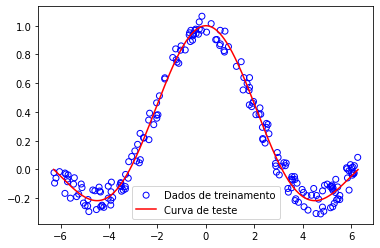

In [9]:
N = 200
x_train = xmin + (xmax - xmin) * np.random.rand(N, 1)
ruido = minLimit + (maxLimit - minLimit) * np.random.rand(N, 1)

y_train = f_x(x_train)
y_train = y_train + ruido
y_train = np.array(y_train, ndmin = 2)

plt.scatter(x_train, y_train, facecolor = 'none', edgecolor = 'blue')
plt.plot(x_test, y_test, 'r')
plt.legend(['Dados de treinamento', 'Curva de teste'])
plt.show()

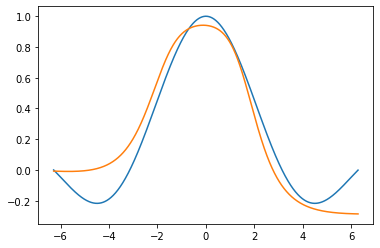

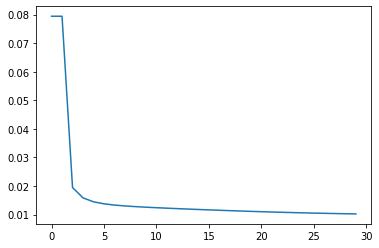

Erro médio quadrado: 0.0165+-0.0


In [10]:
iterations = 1
yEval = np.zeros((x_test.shape[0], iterations))
mse = np.zeros(iterations)

for i in range(iterations):
    x_train = xmin + (xmax - xmin) * np.random.rand(N, 1)
    ruido = minLimit + (maxLimit - minLimit) * np.random.rand(N, 1)
    y_train = f_x(x_train)
    y_train = y_train + ruido
    y_train = np.array(y_train, ndmin = 2)
    x_test = np.array(np.arange(xmin, xmax, 0.01), ndmin = 2).T
    y_test = f_x(x_test)
    xin = np.array(x_train)
    yin = np.array(y_train)
    wt,zt,erroEpocas = trainMLP(xin, yin, p_in, eta, tol, maxEpocas)
    yEval[:,i] = np.squeeze(yMLP(x_test, zt, wt))
    mse[i] = scoreCalc(yEval[:,i], y_test)

plt.plot(x_test, y_test)
plt.plot(x_test, yEval[:,0])
plt.show()

plt.plot(erroEpocas)
plt.show()

meanScore = np.mean(mse)
stdScore = np.std(mse)
print('Erro médio quadrado: ' + str(np.round(meanScore, 4)) + '+-' + str(np.round(stdScore,4)))

Observa-se que a quantidade de amostras do modelo intefere na sua acurácia. Para N = 200, observou-se um erro quadrático médio menor. As curvas geradas como resultado, se aproximam bem do formato da função de entrada, mas ainda, com algumas divergências.